# **Spotify Recommendation System**

---

# Introduction
This analysis explores Spotify's "Million Song Dataset" with the goal of uncovering trends and patterns in music features. By applying data science techniques, I aim to gain insights into some of the attributes that shape song recommendation to the users, and ultimately build a personalized recommendation system. The dataset includes features such as tempo, energy, danceability, and genre, offering a rich foundation for understanding the factors that resonate with listeners.

My approach involves data preprocessing, exploratory analysis, and the application of machine learning models to group similar songs and recommend music that aligns with a user’s mood. We leverage dimensionality reduction and clustering techniques to visualize the underlying structure in the data, allowing for intuitive recommendations.


# 1. Load data

In [38]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Load the data
df = pd.read_csv('/content/drive/Othercomputers/My Laptop - Personal/Files/Data_Files/Portfolio Projects/1 Million songs Spotify/spotify_data.csv', index_col=0) # Google colab file path
# df = pd.read_csv('spotify_data.csv', index_col=0) # local file path
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

| Feature Name | Description |
|---|---|
| popularity | A measure of the song's popularity on Spotify |
| year | The year the song was released |
| genre | The primary genre of the song |
| danceability | Describes how suitable the track is for dancing |
| energy | Represents the perceived intensity and activity level of the track |
| key | The musical key of the song |
| loudness | The overall loudness of the track in decibels (dB) |
| mode | Indicates whether the track is in major (1) or minor (0) key |
| speechiness | The presence of spoken words in the track |
| acousticness | A confidence measure of whether the track is acoustic |
| instrumentalness | The presence of vocals in the track |
| liveness | A confidence measure of whether the track was performed live |
| valence | The positivity conveyed by the track |
| tempo | The average tempo of the track in beats per minute (BPM) |
| time_signature | The time signature of the track |
| duration_minutes | The duration of the track in minutes |

In [42]:
# Function to print out a summary of the Spotify dataset
def data_summary(data):
    """
    Print a summary of the dataset, including the number of unique artists,
    tracks, genres, and the year range of the collected data.

    Parameters:
        data (DataFrame): A pandas DataFrame containing Spotify data with
                          columns 'artist_name', 'track_name', 'year',
                          'genre', and 'duration_ms'.
    """
    # Total number of rows
    total_rows = data.shape[0]
    print(f"Total number of tracks in the dataset: {total_rows}")

    print('____________________________')

     # Total number of columns
    total_columns = data.shape[1]
    print(f"Total number of columns in the dataset: {total_columns}")

    # Number of unique artists
    unique_artists = data['artist_name'].nunique()
    print(f"Number of unique artists: {unique_artists}")

    print('____________________________')

    # Number of unique tracks
    unique_tracks = data['track_name'].nunique()
    print(f"Number of unique tracks: {unique_tracks}")

    print('____________________________')

    # Year range of data collected
    earliest_year = data['year'].min()
    latest_year = data['year'].max()
    print(f"Earliest year in the data is {earliest_year} and latest year is {latest_year}")

    print('____________________________')

    # Number of unique music genres in the data
    unique_genres = data['genre'].nunique()
    print(f"Number of unique genres: {unique_genres}")

    print('____________________________')

    # List of unique genres
    genres = data['genre'].unique()
    print(f"Genres: {', '.join(genres)}")

    print('____________________________')

    # Average duration of tracks
    average_duration = data['duration_ms'].mean() / 1000  # Convert milliseconds to seconds
    print(f"Average duration of tracks: {average_duration:.2f} seconds")

    print('____________________________')

    # Most frequent artist
    most_frequent_artist = data['artist_name'].mode()[0]
    print(f"Most frequent artist: {most_frequent_artist}")

    print('____________________________')

    # Genre distribution
    genre_distribution = data['genre'].value_counts()
    print("Genre distribution:")
    print(genre_distribution)

    print('____________________________')

In [43]:
data_summary(df)

Total number of tracks in the dataset: 1159764
____________________________
Total number of columns in the dataset: 19
Number of unique artists: 64158
____________________________
Number of unique tracks: 882360
____________________________
Earliest year in the data is 2000 and latest year is 2023
____________________________
Number of unique genres: 82
____________________________
Genres: acoustic, afrobeat, alt-rock, ambient, black-metal, blues, breakbeat, cantopop, chicago-house, chill, classical, club, comedy, country, dance, dancehall, death-metal, deep-house, detroit-techno, disco, drum-and-bass, dub, dubstep, edm, electro, electronic, emo, folk, forro, french, funk, garage, german, gospel, goth, grindcore, groove, guitar, hard-rock, hardcore, hardstyle, heavy-metal, hip-hop, house, indian, indie-pop, industrial, jazz, k-pop, metal, metalcore, minimal-techno, new-age, opera, party, piano, pop, pop-film, power-pop, progressive-house, psych-rock, punk, punk-rock, rock, rock-n-roll,

In [44]:
null_values = df.isna().sum()
null_values

,0
artist_name,15
track_name,1
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0
loudness,0


In [45]:
# Since there is now way we could get the name of artists or track due to multiple titles that exist, we can drop them

df = df.dropna()
df.isna().sum()

,0
artist_name,0
track_name,0
track_id,0
popularity,0
year,0
genre,0
danceability,0
energy,0
key,0
loudness,0


In [46]:
# Check for duplicates
df.duplicated().sum()

0

In [47]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

**Skewness:**

Measures the asymmetry of the distribution.
Positive skew indicates a long tail on the right.
Negative skew indicates a long tail on the left.

**Kurtosis:**

Measures the "tailedness" of the distribution.
A high kurtosis indicates a distribution with heavier tails.
A low kurtosis indicates a distribution with lighter tails.

In [48]:
# Statistical check: Skewness and Kurtosis
numerical_cols_df = df[['popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]
skewness = numerical_cols_df.skew()
kurtosis = numerical_cols_df.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 popularity           0.810033
year                -0.110886
danceability        -0.300162
energy              -0.617285
key                 -0.000085
loudness            -1.908822
mode                -0.559289
speechiness          4.473831
acousticness         0.708284
instrumentalness     0.970880
liveness             1.955640
valence              0.173532
tempo                0.237165
duration_ms         10.301177
time_signature      -3.550804
dtype: float64

Kurtosis:
 popularity            0.065254
year                 -1.169703
danceability         -0.501779
energy               -0.649378
key                  -1.286298
loudness              4.863285
mode                 -1.687199
speechiness          23.917106
acousticness         -1.068162
instrumentalness     -0.861880
liveness              3.502836
valence              -1.077568
tempo                -0.099001
duration_ms         228.305416
time_signature       19.754864
dtype: float64


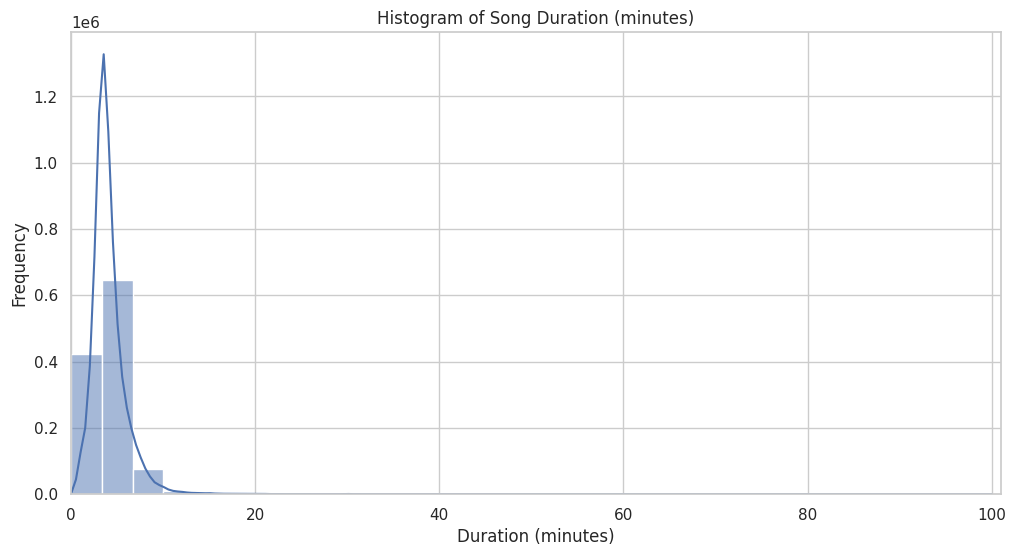

In [49]:
# Create a histogram for duration_ms
# Convert duration from milliseconds to minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Set the style for the plot
sns.set(style="whitegrid")

# Create a histogram for duration_minutes
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_minutes'], bins=30, kde=True)  # Adjust the number of bins as needed
plt.title('Histogram of Song Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, df['duration_minutes'].max() + 1)  # Set x-axis limit slightly above max duration for clarity
plt.show()

 - For songs that are in 7 to 15 minute range, most are live performances which tend to take long.
 - Those beyond 15 minutes to 100 are tracks that aren't songs but could be rain sounds that help people sleep hence take long to play entirely. This can be visualized below.


<Axes: xlabel='duration_minutes'>

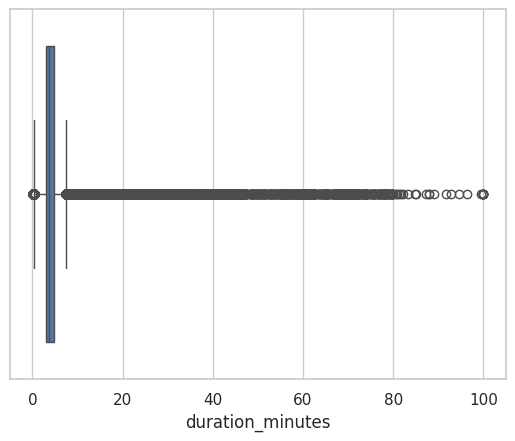

In [50]:
# Time duaration from tracks
sns.boxplot(x=df['duration_minutes'])

<Axes: xlabel='popularity'>

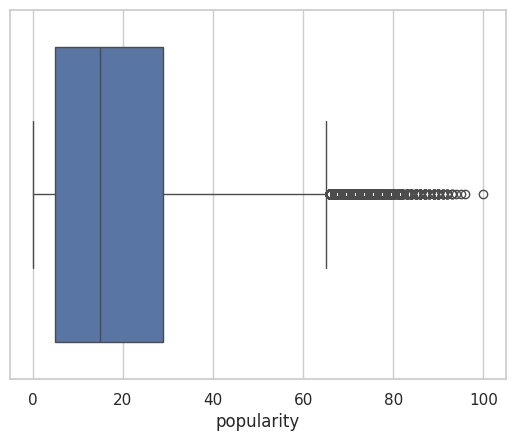

In [51]:
# Popularity visualization
sns.boxplot(x=df['popularity'])

- Seems to be a few songs that are popular than the general data shows. This is expected when it comes to songs from top artists

- 100 minute songs seems unrealistic. I checked them by manually searching a sample of them. Beginning by filtering out songs longer than 7 minutes (an abitrary figure)

In [52]:
# Filter for songs with duration greater than 7 minutes
filtered_songs = df[(df['duration_minutes'] > 7) & (df['duration_minutes'] < 15)].sort_values(by='duration_minutes', ascending=False)
filtered_songs.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
103535,Dean Evenson,River & Forest,5eOE2heqHXkNK6JtJBYcEh,11,2013,sleep,0.105,0.991,2,-28.225,1,0.0607,0.69900,0.95000,0.8970,0.00001,71.743,899907,3,14.998450
105982,La Fleur,Nightflow - Kenny Larkin Drama Mix,0GCpvx0AVrRVavO0SsJGO9,11,2013,swedish,0.917,0.472,11,-10.165,0,0.1300,0.00262,0.10400,0.0763,0.20800,124.015,899864,4,14.997733
209244,Mägo de Oz,Finisterra - 2015,5EtziAX36pgTziXYH4qs1B,32,2015,spanish,0.219,0.916,4,-4.349,0,0.1030,0.00595,0.00114,0.7040,0.43400,74.951,899800,4,14.996667
624758,Lustmord,Black Star,4ikSsfzbD6BNuyWA60x0CO,21,2000,ambient,0.166,0.382,6,-15.946,1,0.0448,0.68300,0.96100,0.6650,0.03590,133.107,899696,4,14.994933
278246,Derisier,Debloke'm Pou Yo We,65KHxK2bgbxWfsyhGEFUz8,22,2017,gospel,0.384,0.855,7,-8.011,1,0.0813,0.21900,0.00000,0.3540,0.74900,99.023,899693,4,14.994883


In [53]:
filtered_songs_greater_twenty = df[df['duration_minutes'] > 15].sort_values(by='duration_minutes', ascending=False)
filtered_songs_greater_twenty.sample(2)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
891157,Nusrat Fateh Ali Khan,Sun Dard Kahani Karbal Dee,047NZCq2UgeVED97XjLrS0,0,2003,indian,0.485,0.736,5,-7.306,1,0.1480,0.576,0.0000,0.8780,0.683,106.167,1823133,4,30.38555
1227641,T. N. Krishnan,Nagumomu,7uPu4Ne9sZHgEXs3E6iagZ,0,2008,indian,0.442,0.461,11,-6.356,0,0.0595,0.875,0.0185,0.0928,0.513,85.390,990354,4,16.50590


In [54]:
sleep_genre = df[df['genre'] == 'sleep']
sleep_genre.shape

(17851, 20)

In [55]:
sleep_genre.head(3)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration_minutes
49942,Rain Sounds,White Noise,7dTyZl4cBRKnPBeq1fdrHY,60,2012,sleep,0.0000,0.601,4,-13.753,0,0.0000,0.119000,0.771,0.968,0.0000,0.000,240000,0,4.000000
49943,Nature Sounds,Relaxing Constant Rain Storm with Distant Thun...,1nKY2o8XQG1RvUCpBV5VSK,54,2012,sleep,0.0735,0.997,8,-12.484,1,0.0995,0.000626,0.975,0.871,0.0119,81.214,570203,4,9.503383
49944,Nature Sounds,Calm Rolling Thunder and Soothing Rain,5Y3bt7xbhZwwHfTPK5hWEg,50,2012,sleep,0.0818,0.294,0,-25.842,1,0.0898,0.067400,0.893,0.359,0.0384,85.349,570270,3,9.504500


In [56]:
# Function to print out data summary
def data_summary(data):
  '''
  '''
  # unique artist
  unique_artists = df['artist_name'].nunique()
  print(f"Number of unique artists: {unique_artists}")

  # unique tracks
  unique_tracks = df['track_name'].nunique()
  print(f"NUmber of unique trackss: {unique_tracks}")

  print('____________________________')

  # Year Range of data collected
  earliest_year = df['year'].min()
  latest_year =  df['year'].max()
  print(f"Earliest year in the data is {earliest_year} and latest year is {latest_year}")

  print('____________________________')

  # Unique music genres in the data and print the genre names
  unique_genres = df['genre'].nunique()
  print(f"Number of unique genres: {unique_genres}")

  print('____________________________')

  genres = df['genre'].unique()
  print(f"genres: {genres}")

In [57]:
data_summary(df)

Number of unique artists: 64158
NUmber of unique trackss: 882349
____________________________
Earliest year in the data is 2000 and latest year is 2023
____________________________
Number of unique genres: 82
____________________________
genres: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-song

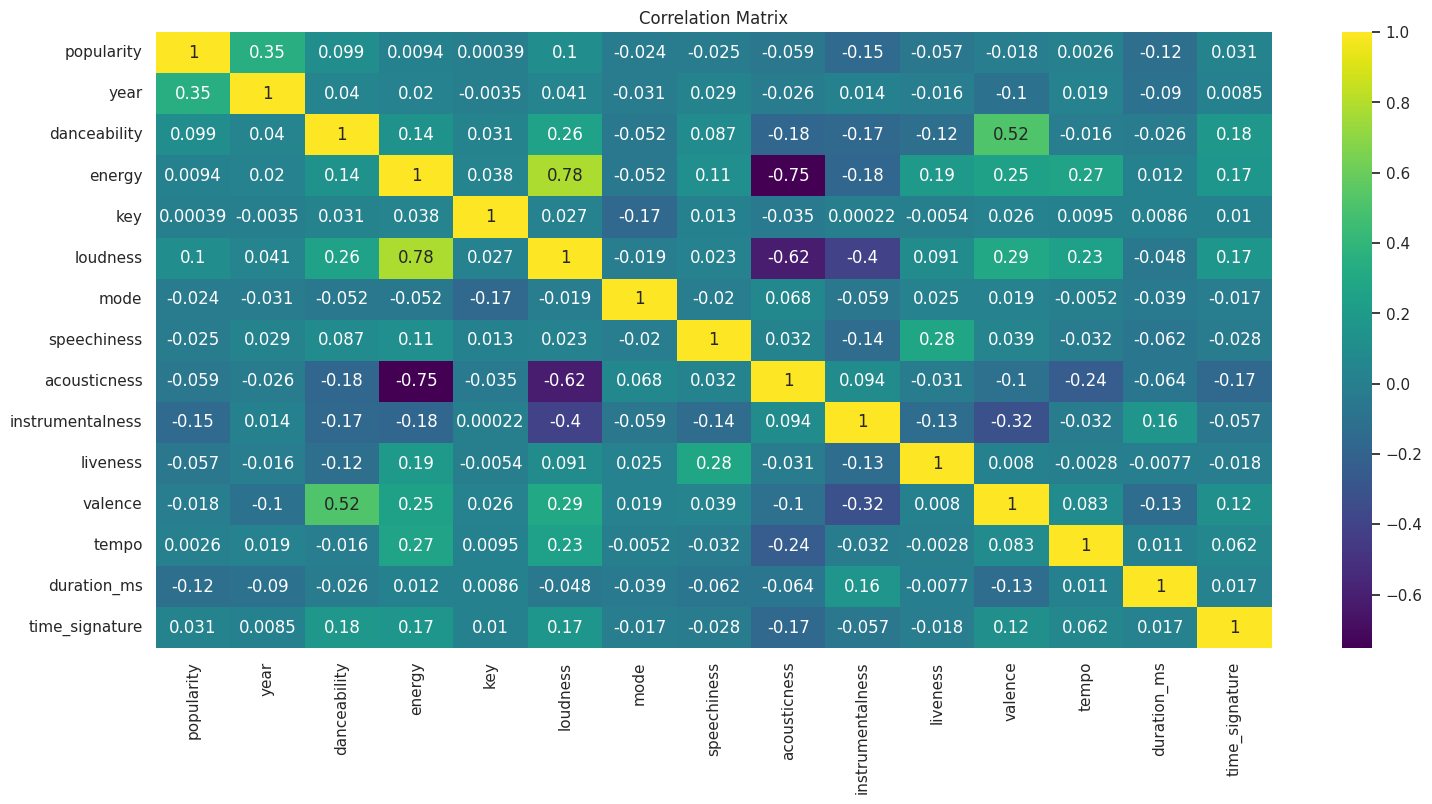

In [58]:
# Correlation matrix
correlation_matrix = numerical_cols_df.corr()

# Create a heatmap
plt.figure(figsize=(18, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

- Features that seem not to be relevant (ie 0 and below)
  - Mode
  - Key
  - Year
  - popularity
  - duration_ms/minutes

In [59]:
genres = df['genre'].unique()
print(len(genres))
genres

82


array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

In [60]:
columns = df.columns
columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'duration_minutes'],
      dtype='object')

In [61]:
# drop the irrelevant colunmns
data = df.drop(['duration_ms','duration_minutes'], axis=1)
data.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [62]:
# new dataframe for modeling
data.sample(3)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
408061,Luna,Something in the Air,3SUMJ1c2roB966QHQnBAg6,4,2019,power-pop,0.342,0.564,4,-6.127,0,0.0284,0.180000,0.005740,0.2550,0.466,171.970,4
735624,Monk & Canatella,Slagger - Radio Mix,4RcKeIXVhPg8cPQ3peP2au,0,2000,trip-hop,0.552,0.896,11,-5.838,1,0.0762,0.006610,0.000609,0.1000,0.491,109.859,4
1217677,Avantasia,I Don't Believe in Your Love - Alternative Ver...,70S9QyNI7j80HKIE5LKhh0,18,2008,german,0.408,0.836,7,-12.681,0,0.0532,0.000697,0.000069,0.0563,0.264,153.056,4


In [63]:
numerical_cols_df.head()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,68,2012,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,50,2012,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,57,2012,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,58,2012,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,54,2012,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [64]:
# Update the numerical_cols_df, drop duration_ms column
numerical_cols_df = numerical_cols_df.drop(['duration_ms'], axis=1)
numerical_cols_df.columns

Index(['popularity', 'year', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

# Feature Engineering

- Start by converting genre values to binary values

In [65]:
data.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,4


In [66]:
# One-Hot Encoding for Genre
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
genre_encoded = encoder.fit_transform(data[['genre']])

# Create a new DataFrame with the encoded genres
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['genre']))

# Merge the encoded genre columns with the original dataset
data_encoded = pd.concat([data, genre_encoded_df], axis=1)


In [67]:
# drop the original genre column
data_encoded.drop('genre', axis=1, inplace=True)
data_encoded.head(2)

,artist_name,track_name,track_id,popularity,year,danceability,energy,key,loudness,mode,...,genre_ska,genre_sleep,genre_songwriter,genre_soul,genre_spanish,genre_swedish,genre_tango,genre_techno,genre_trance,genre_trip-hop
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68.0,2012.0,0.483,0.303,4.0,-10.058,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50.0,2012.0,0.572,0.454,3.0,-10.286,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data_encoded.shape

(1363704, 99)

In [69]:
data_encoded.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'genre_acoustic', 'genre_afrobeat', 'genre_alt-rock',
       'genre_ambient', 'genre_black-metal', 'genre_blues', 'genre_breakbeat',
       'genre_cantopop', 'genre_chicago-house', 'genre_chill',
       'genre_classical', 'genre_club', 'genre_comedy', 'genre_country',
       'genre_dance', 'genre_dancehall', 'genre_death-metal',
       'genre_deep-house', 'genre_detroit-techno', 'genre_disco',
       'genre_drum-and-bass', 'genre_dub', 'genre_dubstep', 'genre_edm',
       'genre_electro', 'genre_electronic', 'genre_emo', 'genre_folk',
       'genre_forro', 'genre_french', 'genre_funk', 'genre_garage',
       'genre_german', 'genre_gospel', 'genre_goth', 'genre_grindcore',
       'genre_groove', 'genre_guitar', 'genre_hard-rock', 'genre_hardcore'

## Start by scaling the numerical features

In [70]:
from sklearn.preprocessing import StandardScaler

genre_columns = [col for col in data_encoded.columns if 'genre_' in col]
features_to_be_scaled = data_encoded.drop(columns=genre_columns)
features_to_be_scaled.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [71]:
# scale the features
# Scaling numerical columns only
exclude_columns = ['track_name', 'artist_name', 'track_id'] + genre_columns
numerical_features = data_encoded.drop(columns=exclude_columns)

# Scale the numerical features
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Convert scaled features back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

# Combine the scaled numerical features with the non-scaled columns
scaled_data_encoded = pd.concat([data_encoded[exclude_columns].reset_index(drop=True),
                                 scaled_numerical_df], axis=1)
scaled_data_encoded.head()

,track_name,artist_name,track_id,genre_acoustic,genre_afrobeat,genre_alt-rock,genre_ambient,genre_black-metal,genre_blues,genre_breakbeat,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,I Won't Give Up,Jason Mraz,53QF56cjZA9RTuuMZDrSA6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.362219,-0.189488,0.758720,-0.393524,1.049226,-0.691216,-0.537222,-1.178954,0.403917,-1.894127
1,93 Million Miles,Jason Mraz,1s8tP3jP4GZcyHDsjvw218,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.643497,-0.229613,0.758720,-0.528338,0.437937,-0.691179,-0.624753,0.221331,0.631455,0.244005
2,Do Not Let Me Go,Joshua Hyslop,7BRCa8MPiyuvr2VU3O9W0F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.643497,-0.832373,0.758720,-0.477093,0.046373,-0.691079,-0.664042,-1.156609,0.619702,0.244005
3,Fast Car,Boyce Avenue,63wsZUhUZLlh1OsyrZq7sz,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.325448,-0.152002,0.758720,-0.445557,1.367548,-0.691216,-0.712781,0.195262,2.806734,0.244005
4,Sky's Still Blue,Andrew Belle,6nXIYClvJAfi6ujLiKqEq8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200336,0.626921,-1.318008,-0.493649,-0.701259,-0.638350,-0.562088,-0.888469,1.695337,0.244005


In [72]:
pip install annoy

In [86]:
from annoy import AnnoyIndex

num_features = scaled_numerical_df.shape[1]

# Initialize Annoy index
annoy_index = AnnoyIndex(num_features, 'euclidean')

# Populate Annoy index with scaled data from `scaled_data_encoded`
for i, row in scaled_numerical_df.iterrows():
    annoy_index.add_item(i, row.values)  # Use scaled values only

# Build the index
annoy_index.build(50)

# Save the index if needed
# annoy_index.save('spotify_recommendation.ann')

True

- To get song recommendations:
  - I need to know the track name to the index
  - I need to know the tack name of the recommeded indeces

In [87]:
# Create track name to index mapping
# Verify the Track Name Mapping
track_name_to_index = {row['track_name']: i for i, row in scaled_data_encoded.iterrows()}

In [88]:
# Function to get similar songs by song name
def get_similar_songs(track_name, n_neighbors=10):
    if track_name in track_name_to_index:
        song_index = track_name_to_index[track_name]
        # Retrieve similar songs
        similar_songs_indices, distances = annoy_index.get_nns_by_item(song_index, n_neighbors, include_distances=True)

        # Create a list of similar song names
        similar_songs = [data.iloc[i]['track_name'] for i in similar_songs_indices]
        return similar_songs, distances
    else:
        return None, None  # Return None if the song name is not found

In [89]:
data.sample(5)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
614170,The Dreadnoughts,Apple Tree Wassail,540tF1P5SHMVeq5V5wECGA,32,2023,punk,0.277,0.883,7,-6.881,0,0.2250,0.04830,0.000039,0.0536,0.496,179.987,4
1373988,Alleycats,Jika Kau Bercinta Lagi - Album Version (Edited),1nN1dunbXSIXxXv4hVuklL,36,2010,k-pop,0.225,0.771,10,-4.670,1,0.0349,0.00522,0.006600,0.1750,0.591,166.789,4
929984,Moes Haven,Flavor Ice,1E04Q7fP55QfqsPEiE46Mn,0,2004,comedy,0.586,0.366,0,-8.522,1,0.0476,0.83800,0.000000,0.1380,0.617,80.914,4
557282,Journey,Don't Stop Believin' - Live,4UcUgT1p13jHkwOyyOFvgC,32,2022,hard-rock,0.234,0.883,8,-7.978,1,0.0844,0.00131,0.000170,0.7490,0.184,126.652,4
786857,Drew Sarich,Donna,5brV3s4r4DLYTvVB3xRZ3V,0,2001,show-tunes,0.604,0.967,8,-3.922,1,0.0932,0.29500,0.000000,0.1970,0.668,104.990,4


In [90]:
# Test
track_name = input('Track name:' )
similar_songs, distances = get_similar_songs(track_name)

if similar_songs:
    print(f"Songs similar to '{track_name}': {similar_songs}")
    print(f"Distances: {distances}")
else:
    print("Track name not found.")

Track name:Donna
Songs similar to 'Donna': ['All You Had to Do Was Tell Me', 'La Adelita', '她在睡夢中', 'Bird On A Wire', "Doesn't Take a Whole Day", 'Those Lonely, Lonely Nights', 'Capiau', 'Show Me Forgiveness', 'Is This The End', 'Trio Sonata in A, Op. 3 No. 12: 4th movement: Allegro']
Distances: [0.9724085927009583, 1.3761550188064575, 1.4235453605651855, 1.4470324516296387, 1.4538272619247437, 1.524619221687317, 1.6442674398422241, 1.685717225074768, 1.6930774450302124, 1.7304977178573608]


 # Evaluate ANNOY index

 - One to evaluate the recommendation efficiency of the ANNOY index is by Similarity Distribution Analysis.
  - It helps to understand the spread of distances (or similarity scores) between the target song and its recommendations, which can reveal how similar or diverse the recommendations are.

In [91]:
import seaborn as sns
import random

def get_distances_for_similarity_analysis(n_samples=100, n_neighbors=10):
    distances_all = []

    # Randomly select n_samples songs for analysis
    sample_songs = random.sample(list(track_name_to_index.keys()), n_samples)

    for song in sample_songs:
        _, distances = get_similar_songs(song, n_neighbors)
        distances_all.extend(distances)  # Accumulate all distances

    return distances_all

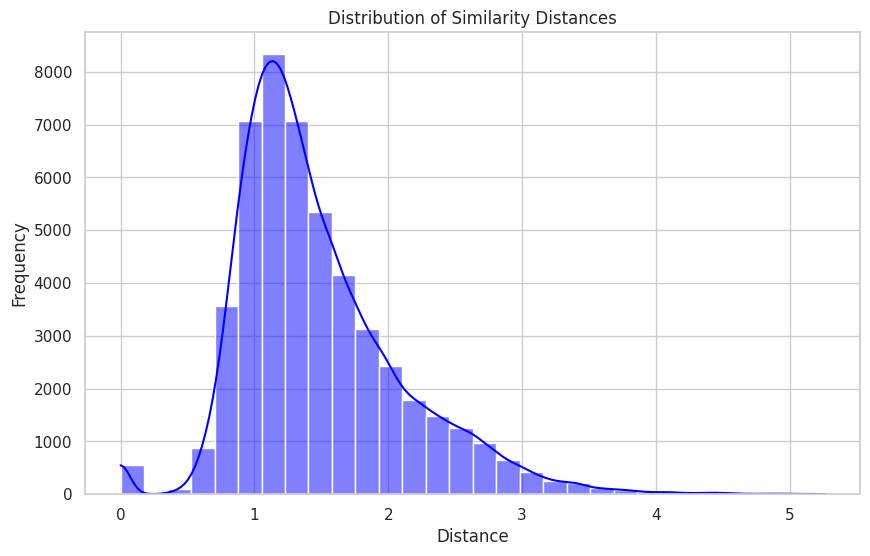

In [94]:
# Run the function to get distances
similarity_distances = get_distances_for_similarity_analysis(n_samples=5000, n_neighbors=10)

# Plot the similarity distance distribution
plt.figure(figsize=(10, 6))
sns.histplot(similarity_distances, kde=True, color="blue", bins=30)
plt.title("Distribution of Similarity Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

- This distribution might imply that the majority of songs are relatively similar to each other, while a smaller group stands out as unique.

**A cumulative distribution function (CDF) plot could also be useful to see how the distances accumulate.**
A  CDF plots the cumulative probability of the random variable is the similarity distance between songs


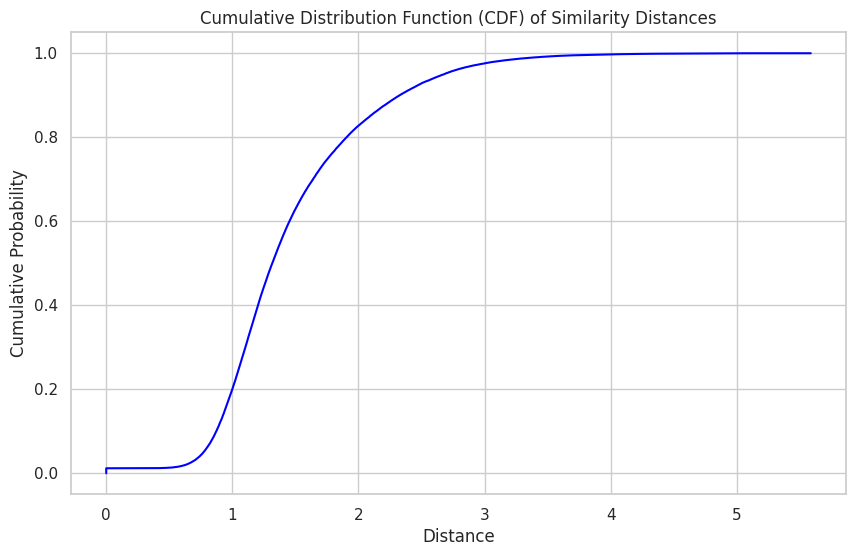

In [93]:
# Calculate the CDF
sorted_distances = np.sort(similarity_distances)
cdf = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances, cdf, color="blue")
plt.title("Cumulative Distribution Function (CDF) of Similarity Distances")
plt.xlabel("Distance")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()

#### Conclusion from the CDF plot
1. Majority of Song Pairs are Moderately Similar: The steep rise in the CDF around a distance of 2 suggests that a significant proportion of song pairs have moderate similarity.
2. Fewer Pairs are Very Similar or Very Dissimilar: The flatter regions at both ends of the CDF indicate that fewer pairs are either highly similar or highly dissimilar.
3. Potential for Clustering: The clear demarcation between different regions of the CDF suggests that clustering algorithms might be effective in grouping similar songs together.